# Why Study a Dataset?
Let’s kick things off by pondering the question of why we should take the time to study a dataset. Data is the primary
ingredient of deep learning, and although it’s our task as neural network programmers to let our neural networks learn
from our data, we still have the responsibility of knowing the nature and history of the data we are using to actually
do the training.

It’s the programmer’s job to oversee and guide the learning process though training. We can think of this as an
indirect way of writing software or code. By using data and deep learning, neural network programmers can produce
software capable of performing computations without writing code to explicitly carry out these computations.

Data focused considerations:

    · Who created the dataset?
    · How was the dataset created?
    · What transformations were used?
    · What intent does the dataset have?
    · Possible unintentional consequences?
    · Is the dataset biased?
    · Are there ethical issues with the dataset?

In practice, acquiring and accessing data is often of the hardest parts of deep learning, so keep this in mind as we go
though this particular dataset. Take note of the general concepts and ideas that we see here.

# What is the MNIST Dataset?
The MNIST dataset, Modified National Institute of Standards and Technology database, is a famous dataset of
handwritten digits that is commonly used for training image processing systems for machine learning.

MNIST is famous because of how often the dataset is used. It’s common for two reasons:

    1) Beginners use it because it’s easy
    2) Researchers use it to benchmark (compare) different models.

The dataset consists of 70,000 images of hand written digits with the following split:

    · 60,000 training images
    10,000 testing images

MNIST has been so widely used, and image recognition tech has improved so much that the dataset is considered to be
too easy. This is why the Fashion-MNIST dataset was created.

# What is Fashion-MNIST?
Fashion-MNIST as the name suggests is a dataset of fashion items.
Specifically, the dataset has the following ten classes of fashion items:

Index Label

0   T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

# What's MNIST about fashion dataset?
The reason the fashion MNIST dataset has MNIST in it’s name is because the creators seek to replace the MNIST with
Fashion-MNIST.

For this reason, the Fashion dataset was designed to mirror the original MNIST dataset as closely as possible while
introducing higher difficulty in training due to simply having more complex data than hand written images.

We’ll see the specific ways that Fashion-MNIST mirrors the original dataset in the paper, but one thing we have already
seen is the number of classes.

    · MNIST – has 10 classes (one for each digit 0-9)
    · Fashion-MNIST – has 10 classes (this is intentional)

# How Fashion-MNIST Was Built
Unlike the MNIST dataset, the fashion set wasn’t hand-drawn, but the images in the dataset are actual images from
Zalando’s website.

However, they have been transformed to more closely correspond to the MNIST specifications. This is the general
conversion process that each image from the site went through:

    1) Converted to PNG
    2) Trimmed
    3) Resized
    4) Sharpened
    5) Extended
    6) Negated
    7) Gray-scaled

# The Project (Bird's-Eye View)
There are four general steps that we’ll be following as we move through this project:

    1) Prepare the data
    2) Build the model
    3) Train the model
    4) Analyze the model’s results

# The ETL Process
To prepare our data, we'll be following what is loosely known as an ETL process.

    · Extract data from a data source.
    · Transform data into a desirable format.
    · Load data into a suitable structure.

The ETL process can be thought of as a fractal process because it can be applied on various scales. The process can be
applied on a small scale, like a single program, or on a large scale, all the way up to the enterprise level where
there are huge systems handling each of the individual parts.

Once we have completed the ETL process, we are ready to begin building and training our deep learning model.
PyTorch has some built-in packages and classes that make the ETL process pretty easy.

# PyTorch Imports

In [107]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

import torchvision
import torchvision.transforms as transforms

Package	Description

    · torch	The top-level PyTorch package and tensor library.

    · torch.nn	A subpackage that contains modules and extensible classes for building neural networks.

    · torch.optim	A subpackage that contains standard optimization operations like SGD and Adam.

    · torch.nn.functional	A functional interface that contains typical operations used for building neural networks
    like loss functions and convolutions.

    · torchvision	A package that provides access to popular datasets, model architectures, and image transformations
    for computer vision.

    · torchvision.transforms	An interface that contains common transforms for image processing.

# Other Imports
The next imports are standard packages used for data science in Python:

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import pdb

torch.set_printoptions(linewidth=120)

Note that pdb is the Python debugger and the last line sets the print options for PyTorch print statements.

# Preparing Our Data Using PyTorch
Our ultimate goal when preparing our data is to do the following (ETL):

    1) Extract – Get the Fashion-MNIST image data from the source.
    2) Transform – Put our data into tensor form.
    2) Load – Put our data into an object to make it easily accessible.

For these purposes, PyTorch provides us with two classes:

    Class	Description

    ·  torch.utils.data.Dataset	An abstract class for representing a dataset.
    ·  torch.utils.data.DataLoader	Wraps a dataset and provides access to the underlying data.

An abstract class is a Python class that has methods we must implement, so we can create a custom dataset by creating
a subclass that extends the functionality of the Dataset class.

To create a custom dataset using PyTorch, we extend the Dataset class by creating a subclass that implements these
required methods. Upon doing this, our new subclass can then be passed to the a PyTorch DataLoader object.

We will be using the fashion-MNIST dataset that comes built-in with the torchvision package, so we won’t have to do
this for our project. Just know that the Fashion-MNIST built-in dataset class is doing this behind the scenes.

All subclasses of the Dataset class must override __len__, that provides the size of the dataset, and __getitem__,
supporting integer indexing in range from 0 to len(self) exclusive.

# PyTorch Torchvision Package
The torchvision package, gives us access to the following resources:

    · Datasets (like MNIST and Fashion-MNIST)
    · Models (like VGG16)
    · Transforms
    · Utils

Here is the class definition from PyTorch's torchvision source code:

class FashionMNIST(MNIST):

    """`Fashion-MNIST <https://github.com/zalandoresearch/fashion-mnist>`_ Dataset.

    Args:
        root (string): Root directory of dataset where ``processed/training.pt``
            and  ``processed/test.pt`` exist.
        train (bool, optional): If True, creates dataset from ``training.pt``,
            otherwise from ``test.pt``.
        download (bool, optional): If true, downloads the dataset from the internet and
            puts it in root directory. If dataset is already downloaded, it is not
            downloaded again.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.RandomCrop``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
    """
    urls = [
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz',
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz',
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz',
        'http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz',
    ]

# PyTorch Dataset Class
To get an instance of the FashionMNIST dataset using torchvision, we just create one like so:

In [109]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

Note that the root argument used to be './data/FashionMNIST', however, it has since changed due to torchvision updates.

We specify the following arguments:

    Parameter	Description

    · root	The location on disk where the data is located.
    · train	If the dataset is the training set
    · download	If the data should be downloaded.
    · transform	A composition of transformations that should be performed on the dataset elements.

Since we want our images to be transformed into tensors, we use the built-in transforms.ToTensor() transformation,
and since this dataset is going to be used for training, we’ll name the instance train_set.

# PyTorch DataLoader Class
To create a DataLoader wrapper for our training set, we do it like this:

In [110]:
train_loader = DataLoader(
    train_set,
    batch_size=1000,
    shuffle=True
)

We just pass train_set as an argument. Now, we can leverage the loader for tasks that would otherwise be pretty
complicated to implement by hand:

    · batch_size (1000 in our case)
    · shuffle (True in our case)
    · num_workers (Default is 0 which means the main process will be used)

# ETL Summary
From an ETL perspective, we have achieved the extract, transform and load using torchvision when we created the dataset:

    1) Extract – The raw data was extracted from the web (download).
    2) Transform – The raw image data was transformed into a tensor (transforms.Compose([transforms.toTensor()])).
    3) Load – The train_set was wrapped by (loaded into) the data loader giving us access to the underlying data.

Now, we should have a good understanding of the torchvision module that is provided by PyTorch, and how we can use
Datasets and DataLoaders in the PyTorch torch.utils.data package to streamline ETL tasks.

# Exploring The Data
To see how many images are in our training set, we can check the length of the dataset using the Python len() function:

In [111]:
print(len(train_set))

60000


This 60000 number makes sense based on what we learned in the post on the Fashion-MNIST dataset. Suppose we want to see
the labels for each image. This can be done like so:

In [112]:
print(train_set.targets)

tensor([9, 0, 0,  ..., 3, 0, 5])


If we want to see how many of each label exists in the dataset, we can use the PyTorch bincount() function like so:

In [113]:
print(train_set.targets.bincount())

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


# Class Imbalance: Balanced And Unbalanced Datasets
This shows us that the Fashion-MNIST dataset is uniform with respect to the number of samples in each class.
This means we have 6000 samples for each class. As a result, this dataset is said to be balanced. If the classes had a
varying number of samples, we would call the set an unbalanced dataset.

Class imbalance is a common problem, but in our case, we have just seen that the Fashion-MNIST dataset is indeed
balanced, so we need not worry about that for our project.

# Accessing Data In The Training Set
To access an individual element from the training set, we first pass the train_set object to Python’s iter() built-in
function, which returns an object representing a stream of data.

With the stream of data, we can use Python built-in next() function to get the next data element in the stream of data.
From this we are expecting to get a single sample, so we’ll name the result accordingly:

In [114]:
sample = next(
    iter(train_set)
)
print(
    len(sample)
)

2


After passing the sample to the len() function, we can see that the sample contains two items, and this is because the
dataset contains image-label pairs. Each sample we retrieve from the training set contains the image data as a tensor
and the corresponding label as a tensor.

Since the sample is a sequence type, we can use sequence unpacking to the sample's image and it's corresponding label.
We will now check the type of the image and the label and see if they are both torch.Tensor objects:

In [115]:
image = sample[0]
label = sample[1]
print(
    type(image), type(label)
)

<class 'torch.Tensor'> <class 'int'>


We can see that each image is a torch.Tensor object, and each label is an integer (scalar).

We’ll check the shape to see that the image is a 1 x 28 x 28 tensor while the label is a scalar valued tensor:

In [116]:
print(image.shape)
print(
    torch.tensor(label).shape
)

torch.Size([1, 28, 28])
torch.Size([])


We’ll also call the squeeze() function on the image to see how we can remove the dimension of size 1.

In [117]:
print(
    image.squeeze().shape
)

torch.Size([28, 28])


Again, based on our previous discussion of the Fashion-MNIST dataset, we do expect to see the 28 x 28 shape for our
image. The reason we see a 1 on the first dimension of the tensor is because the number of channels needs to be
represented. Opposed to RGB images that have 3 color channels, grayscale images have a single color channel. This is
why we have a 1 x 28 x 28 tensor. We have 1 color channel that has a size of 28 x 28.

Let’s plot the image now, and we’ll see why we squeezed the tensor in the first place. We first squeeze the tensor to
2 dimentions and then pass it to the imshow() function.

tensor(9)


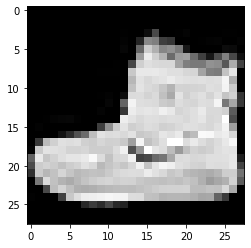

In [118]:
plt.imshow(
    image.squeeze(),
    cmap='gray'
)
print(
    torch.tensor(label)
)

We get back an ankle-boot and the label of 9. We know that the label 9 represents an ankle boot.

# PyTorch DataLoader: Working With Batches Of Data
We’ll start by creating a new data loader with a smaller batch size of 10 so it’s easy to demonstrate what’s going on:

In [119]:
small_train_loader = DataLoader(
    train_set,
    batch_size=10,
    shuffle=True
)
batch = next(
    iter(small_train_loader)
)
print(len(batch))
images, labels = batch
print('Types:', type(images), type(labels))
print('Shapes:', images.shape, labels.shape)

2
Types: <class 'torch.Tensor'> <class 'torch.Tensor'>
Shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


Since batch_size=10, we know we are dealing with a batch of 10 images and 10 corresponding labels. This is why we went
plural on the variable names.

The types are tensors like we’d expect. However, the shapes are different from what we saw with the single sample.
Instead of having a single scalar value as our label, we have a rank-1 tensor with 10 values.

The batch size of 10, is why we now have a 10 in the leading dimension of the tensor, one index for each image.
The following gives us the first ankle-boot we saw before:

In [120]:
print(
    images[0].shape, labels[0].shape
)

torch.Size([1, 28, 28]) torch.Size([])


Note that a single image has shape (1, 28, 28) indicating a single color channel and resolution of 28 x 28 px,
and the label shape is [] meaning that it is a 0 rank tensor - just a scalar.

To plot a batch of images, we can use the torchvision.utils.make_grid() function to create a grid that can be plotted
like so:

torch.Size([3, 32, 302])
torch.Size([32, 302, 3])
Labels: tensor([8, 9, 0, 3, 4, 6, 0, 9, 8, 3])


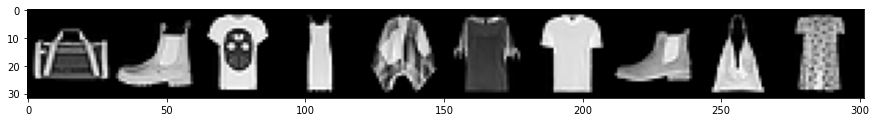

In [121]:
grid = torchvision.utils.make_grid(
    images,
    nrow=10
)
plt.figure(
    figsize=(15, 15)
)
plt.imshow(
    np.transpose(grid, (1, 2, 0))
)
print(grid.shape)
print(np.transpose(grid, (1, 2, 0)).shape)
print('Labels:', labels)

The permute() PyTorch tensor method can be used in place of np.transpose():

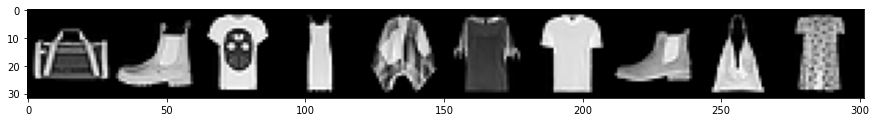

In [122]:
grid = torchvision.utils.make_grid(
    images,
    nrow=10
)
plt.figure(
    figsize=(15, 15)
)
plt.imshow(
    grid.permute(
        (1, 2, 0)
    )
)

# How To Plot Images Using PyTorch DataLoader

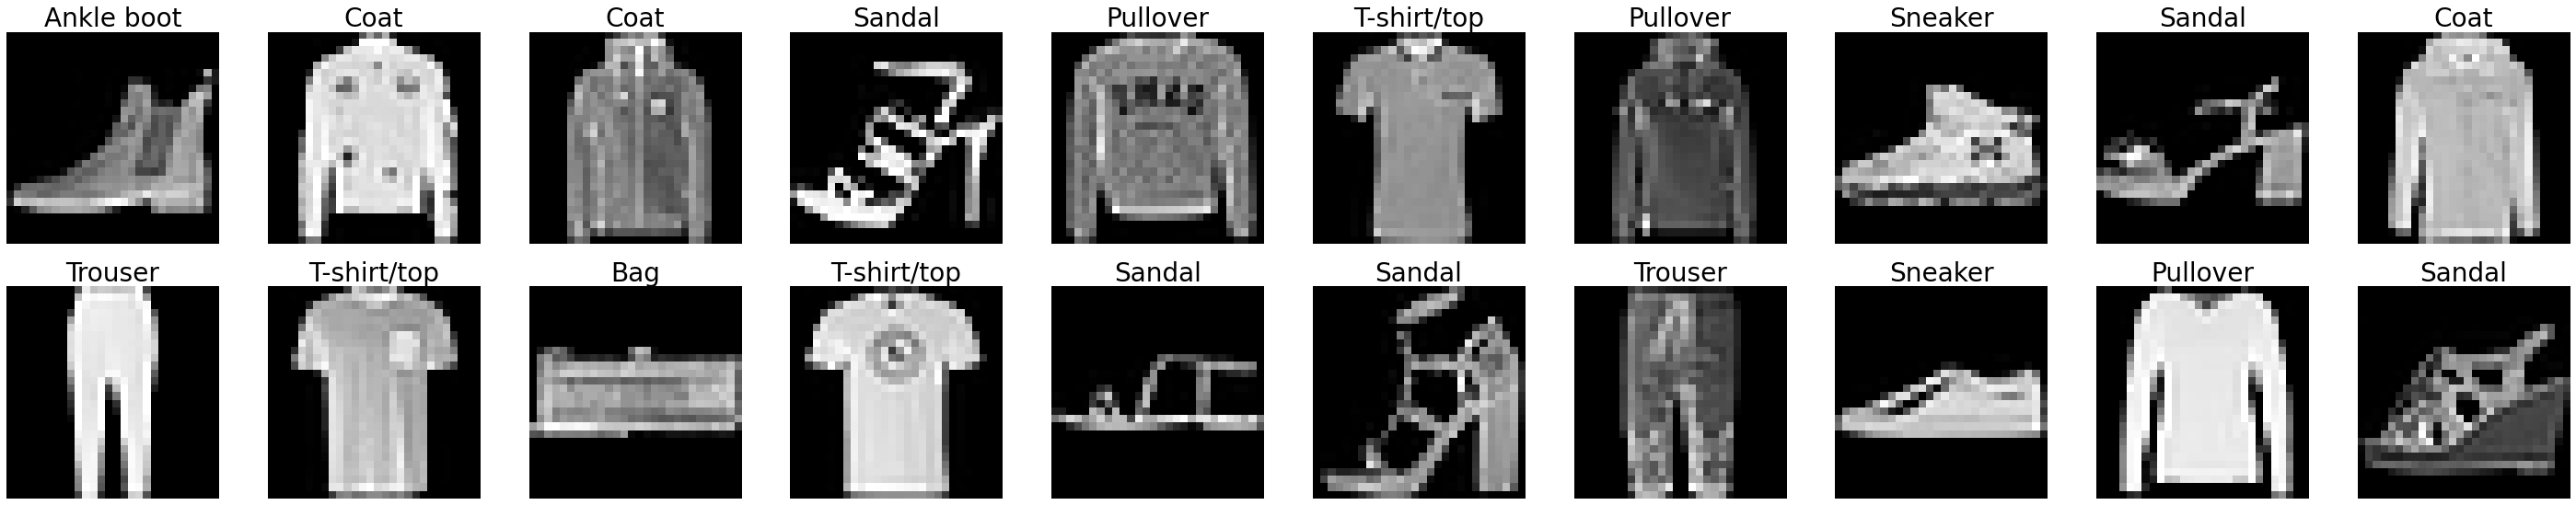

In [123]:
single_train_loader = DataLoader(
    train_set,
    batch_size=1,
    shuffle=True
)
plt.figure(
    figsize=(50, 50)
)
for i, batch in enumerate(single_train_loader, start=1):
    image, label = batch
    plt.subplot(10, 10, i)
    plt.imshow(image.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if i >= 20:
        break
plt.show()
